In [12]:
from IPython.display import Image
import cv2
import numpy as np

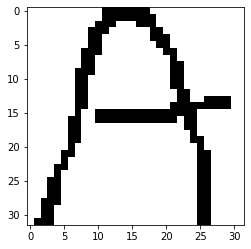

In [13]:
Image(url='../Dataset/Junk/hasy-data/v2-00011.png')
img=cv2.imread('../Dataset/Junk/hasy-data/v2-00010.png')
# cv2.imshow('s',img)
# cv2.waitKey()
# arr=np.rot90(img,3)
# arr=np.fliplr(arr)


import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()


In [14]:
import csv
from PIL import Image as pil_image
import keras.preprocessing.image

In [16]:
imgs=[]
classes=[]
with open('../Dataset/Junk/hasy-data-labels.csv') as csvfile:
    csvreader=csv.reader(csvfile)
    i=0
    for row in csvreader:
        if i > 0:
            img = keras.preprocessing.image.img_to_array(pil_image.open('../Dataset/Junk/'+row[0]))
            img/=255.0
            imgs.append((row[0],row[2],img))
            classes.append(row[2])
        i+=1
        

In [17]:
imgs[0]

('hasy-data/v2-00000.png', 'A', array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]], dtype=float32))

In [18]:
len(imgs)

168233

In [19]:
import random
random.shuffle(imgs)
split_idx = int (0.8*len(imgs))
train=imgs[:split_idx]
test=imgs[split_idx:]

In [20]:
import numpy as np
train_input = np.asarray(list(map(lambda row: row[2], train)))
test_input = np.asarray(list(map(lambda row: row[2],test)))

MemoryError: Unable to allocate array with shape (134586, 32, 32, 3) and data type float32

In [21]:
train_output = np.asarray(list(map(lambda row: row[1], train)))
test_output = np.asarray(list(map(lambda row: row[1],test)))

MemoryError: Unable to allocate array with shape (33647, 32, 32, 3) and data type float32

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(classes)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded= integer_encoded.reshape(len(integer_encoded),1)
onehot_encoder.fit(integer_encoded)


train_output_int = label_encoder.transform(train_output)
train_output = onehot_encoder.transform(train_output_int.reshape(len(train_output_int),1))
test_output_int = label_encoder.transform(test_output)
test_output = onehot_encoder.transform(test_output_int.reshape(len(test_output_int),1))

num_classes = len(label_encoder.classes_)
print('Number of classes %d' % num_classes)



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size(3,3), activation='relu',input_shape=np.shape(train_input[0])))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

In [ ]:
import keras.callbacks
tensorboard = keras.callbacks.TensorBoard(log_dir='./logs/mnist-style')

In [ ]:
model.fit(train_input,train_output,batch_size=32,epochs=10,verbose=2,validation_split=0.2,
          callbacks=[tensorboard])

In [ ]:
score= model.evaluate(test_input,test_output,verbose=2)
print('test loss:',score[0])
print('test accuracy',score[1])

In [ ]:
import time

results=[]
for conv2d_count in [1,2]:
    for dense_size in [128,256,512,1024,2048]:
        for dropout in [0.0,0.25,0.50,0.75]:
            model = Sequential()
            for i in range(conv2d_count):
                if i==0:
                    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=np.shape(train_input[0])))
                else:
                    model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Flatten())
            model.add(Dense(dense_size,activation='tanh'))
            if dropout>0.0:
                model.add(Dropout(dropout))
            model.add(Dense(num_classes,activation='softmax'))
            
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            
            log_dir = './logs/conv2d_%d-dense_%d-dropout_%.2f' % (conv2d_count,dense_size,dropout)
            tensorboard = keras.callbacks.Tensorboard(log_dir=log_dir)
            
            start = time.time()
            
            model.fit(train_input,train_output,batch_size=32,epochs=10,verbose=0,validation_split=0.2,callbacks=[tensorboard])
            score = model.evaluate(test_input,test_output,verbose=2)
            end=time.time()
            elapsed=end-start
            print('Conv2D count: %d, Dense size: %d, Dropout: %.2f - Loss: %.2f, Accuracy: %.2f, Time:%d sec' %  \ (conv2d_count, dense_size, dropout, score[0],score[1],elapsed ))

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size(3,3), activation='relu',input_shape=np.shape(train_input[0])))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary)

model.fit(np.concatenate((train_input,test_input)),
         np.concatenate((train_output,test_output)),
         batch_size=32,epochs=10,verbose=2)
model.save('mathsymbols.model')

np.save('classes.npy',label_encoder.classes_)

In [ ]:
import keras.models
model2=keras.models.load_model('mathsymbols.model')
print(model2.summary)

label_encoder2 = LabelEncoder()
label_encoder2.classes_=np.load('classes.npy')

def predict(img_path):
    newimg = keras.preprocessing.image.img_to_array(pil_image.open(img_path))
    newimg /=255.0
    
    prediction = model2.predict(newimg.reshape(1,32,32,3))
    
    inverted = label_encoder2.inverse_transform([np.argmax(prediction)])
    print('Prediction: %s, confidence: %.2f' % (inverted[0], np.max(prediction)))
    